## Data preparation for review.csv

We use this notebook to detect the commants language

In [1]:
#pip install googletrans

In [1]:
import numpy as np
import pandas as pd
from langdetect import detect
import nltk
import emoji
from googletrans import Translator
import re
import unicodedata
import matplotlib.pyplot as plt
from deep_translator import GoogleTranslator

In [2]:
df = pd.read_csv('reviews.csv')
df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,109,449036,2011-08-15,927861,Edwin,The host canceled my reservation the day befor...
1,109,74506539,2016-05-15,22509885,Jenn,Me and two friends stayed for four and a half ...
2,2708,13994902,2014-06-09,10905424,Kuberan,i had a wonderful stay. Everything from start ...
3,180926,424635,2011-08-06,892106,Brian,Rebecca was a great host! She was very friend...
4,180926,13396837,2014-05-26,3220350,Julia,We had a wonderful time in this cabin with our...


In [3]:
df.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

In [4]:
# Check missing value
df.isnull().sum()

listing_id         0
id                 0
date               0
reviewer_id        0
reviewer_name      2
comments         325
dtype: int64

In [5]:
# Check number of rows
df.shape

(1398664, 6)

#### Since we have more than 1 millions data, so we are going to drop the nan value.

In [6]:
df.dropna()
df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,109,449036,2011-08-15,927861,Edwin,The host canceled my reservation the day befor...
1,109,74506539,2016-05-15,22509885,Jenn,Me and two friends stayed for four and a half ...
2,2708,13994902,2014-06-09,10905424,Kuberan,i had a wonderful stay. Everything from start ...
3,180926,424635,2011-08-06,892106,Brian,Rebecca was a great host! She was very friend...
4,180926,13396837,2014-05-26,3220350,Julia,We had a wonderful time in this cabin with our...


#### Since this is a large dataset, we want to try with a small dataset to test our code, and see what values inside comments.

In [7]:
# We randomly select 10k rows from orginal dataframe.
test_df = df.sample(n=10000)
test_df = test_df.reset_index(drop=True)
test_df.shape

(10000, 6)

In [8]:
# Detect language
def detect_language(text):
    try:
        return detect(text)
    except:
        return 'Error'

In [9]:
test_df['language'] = test_df['comments'].apply(detect_language)

In [10]:
# We want to fully display the value in a cell. 
pd.set_option('display.max_colwidth', None)

In [11]:
test_df.sample(60)

,listing_id,id,date,reviewer_id,reviewer_name,comments,language
6959,18960421,597116270936607326,2022-04-03,4112501,Ann,"All the other reviewers are accurate in descriptions of this listing in terms of comfort, location, etc. great place overall. <br/><br/>The neighbor does have a large dog and the owner also has a small dog. Both dogs bark periodically, including at night.",en
1860,37915615,700956697,2020-10-16,23193060,Rob,Wonder place to stay.,en
7650,23844300,630115289,2020-06-16,122279480,Samuel,Ralph's place is amazing with incredible views of topanga canyon! We appreciated that there were all the cooking basics and even a dishwasher. It was in a great location and close enough for multiple day trips to awesome southern california destinations. Very clean and worth the stay.,en
3270,20235457,240424077,2018-03-04,68523532,Jaclyn,"We stayed here for a girls trip, and the house was perfect! Not only want the location beautiful the house was comfy and cozy. All the beds were so comfortable and there were plenty of amenities for all of us. Chris was a wonderful host!",en
3672,734008696855755257,834917563524891632,2023-02-25,333131712,Alejandra,Awesome place!,en
4042,15356852,561144520,2019-11-08,31614617,Amy,Lovely place with a cute patio with fireplace and hot tub. The space is very quaint which fit 2 guests perfectly. There were a few things that could be improved (shower head leaking water to the outside of the bathroom) and some ants but overall it was still bearable and more just nuisances. I would still recommend this place as Silver Lake is a cute neighborhood!,en
6823,3227096,59495804,2016-01-11,217354,Jennifer,"Eric was a fantastic host, very friendly and responsive, and I absolutely loved his place. Quiet, comfortable, well laid out, with everything I needed for a great weeklong stay. Great view out the main window. And there was even a beautiful bouquet of flowers on the table when I arrived, and he had thoughtfully brought in extra heaters and blanket, since there was cold weather in the forecast. Also really appreciated being able to bring my dog. Would definitely stay here again. Thank you!",en
1584,37911722,730108848,2021-02-09,117966637,Christina,"Highly recommend!! Everything was great to the home and location. The home can get chilly at times the space heater helps and opening the blinds to allow sun worked to keep warm. The best host you’ll experience, can’t wait to return on next visit.",en
8033,27402338,459848784,2019-05-27,194705607,Troy,Wendy is a wonderful host. The home is beautiful and the views are amazing! We really enjoyed our family time in this beautiful setting. Everything was so much more than we expected. Thank you so much for making our time special!,en
7243,51910351,605084841893493717,2022-04-14,123638879,Yannick,I had an amazing stay. Very beautiful and clean apt. Thanks for the excellent communication.,en


Now our code is working for detecting language, so we can apply it to the orginial dataset. 

Also, we can see the following in our dataset.
- There are '.' as value.
- There are more than 1 language in a cell. For example, Chinese + English.
- There are special character such as '< br/ >' and '/r' inside the value.
- There are emoji inside the value.


In [12]:
test_df[test_df['comments']=='.']

,listing_id,id,date,reviewer_id,reviewer_name,comments,language
76,40991848,684077096836429315,2022-08-01,468892239,Anthony,.,Error
747,53827863,787023248482143130,2022-12-21,151996612,Daphne,.,Error
1630,36839383,581896435330297326,2022-03-13,204721483,Luis,.,Error
2109,45421298,476142100163998565,2021-10-18,394815724,Gwendolyn,.,Error
5331,611761264091669516,627601134929496375,2022-05-15,317155639,Briana,.,Error
5919,706717423990881259,795814617252515294,2023-01-02,340385420,Patricia,.,Error
7133,38812665,458691903656025998,2021-09-24,372978466,Dave,.,Error
7935,14573464,438848049,2019-04-17,28025264,Charles,.,Error


______

### Apply on large dataset
#### Data cleaning

In [13]:
cleaned_df = df[df['comments'] != '.']

In [14]:
# Remove special characters
cleaned_df.loc[:, 'comments'] = cleaned_df.loc[:, 'comments'].str.replace(r':\)|<3|\r|<br/>', ' ', regex=True)

In [15]:
# Check if whether it is successfully removed. id = 24190331
cleaned_df[cleaned_df['id']==24190331]

,listing_id,id,date,reviewer_id,reviewer_name,comments
161032,3194941,24190331,2014-12-22,23192102,Asel,"Thank you Lucia and Nick, we had such a wonderful time. Everything was perfect, house is very clean and cosy , location is convenient, price is more than fair."


In [16]:
# Remove emoji
cleaned_df.loc[:, 'comments'] = cleaned_df['comments'].apply(lambda x: emoji.demojize(str(x))) # Convert emoji to text
cleaned_df.loc[:, 'comments'] = cleaned_df['comments'].str.replace(r':[^:]+:', '', regex=True) # Remove the emoji text


In [17]:
# Check with id = 500106629941392940, 131790407
cleaned_df[cleaned_df['id']==500106629941392940]

,listing_id,id,date,reviewer_id,reviewer_name,comments
327040,9365179,500106629941392940,2021-11-20,34077134,Nicole,This place looks even better in person! Everything decorated so perfectly. The bed is extremely comfortable and cozy. I coulda stay in all day! I will definitely be returning.


#### Detect language

In [18]:
cleaned_df['language'] = cleaned_df['comments'].apply(detect_language)

/var/folders/jh/nyglx1sn7pn4r0h2m50ghdbm0000gn/T/ipykernel_21471/528983996.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['language'] = cleaned_df['comments'].apply(detect_language)


In [19]:
cleaned_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,language
0,109,449036,2011-08-15,927861,Edwin,The host canceled my reservation the day before arrival.,en
1,109,74506539,2016-05-15,22509885,Jenn,"Me and two friends stayed for four and a half months. It was a great place to stay! The apartment was very comfortable and I really enjoyed having the park with running path across the street. The only downside was it wasn't within walking distance to restaurants, bars, or coffee shops. But they are a short drive away. Overall, great stay!",en
2,2708,13994902,2014-06-09,10905424,Kuberan,i had a wonderful stay. Everything from start to the end was perfect. Will come back again.,en
3,180926,424635,2011-08-06,892106,Brian,"Rebecca was a great host! She was very friendly and also had two very friendly dogs. The cabin was great, although it had some bugs, but I guess you can't really escape that when you're out in mountains. The beds were really really comfortable - probably even more comfortable then the bed I have at home. There backyard is really really big and they have some farm animals, like goats and pigs. My friends came here to have a quiet place to retreat, and we got that here. There place was also about 2-3 miles from the beach which was really nice! It was great to have both of two worlds, the mountains and the beach at the same time. I would come and stay here again.",en
4,180926,13396837,2014-05-26,3220350,Julia,"We had a wonderful time in this cabin with our ""family of 6!"" Even the giant goat encounter, the non-working fridge, and the dog barking all through the night, it was a lovely getaway. We did a lot of hiking with amazing views and the kids absolutely loved playing in the countryside with all the wooden logs, the kayak (?), the rustic ""tools,"" and many other things. Rebecca and Alice are wonderful and friendly hosts, and we enjoyed interacting with them a lot!",en


Check 'error' comments. Based on below table, we can see that the values are empty string, symbols and numbers. We have many data, so we will drop these data.

In [20]:
cleaned_df[cleaned_df['language']=='Error']

,listing_id,id,date,reviewer_id,reviewer_name,comments,language
1673,5729,328280107,2018-09-25,204357260,旻昇,,Error
6555,75212,179580260,2017-08-07,2165421,Michelle,,Error
7274,237988,286217988,2018-07-05,197324233,Hatun,,Error
7687,239032,315029032,2018-08-27,85461631,Samantha,*,Error
7990,76561,708061245,2020-11-10,369321456,Eduardo,,Error
...,...,...,...,...,...,...,...
1397627,808076848392842110,830620664038776991,2023-02-19,158560741,Andres,,Error
1397705,808433155800964194,830575726045064295,2023-02-19,86165718,Cali,,Error
1397828,811797564924517493,831280184012179542,2023-02-20,495627058,Melly,,Error
1398054,816031169626975181,830541326722918273,2023-02-19,325245237,Jameel,,Error


In [21]:
cleaned_df = cleaned_df.drop(cleaned_df[cleaned_df['language'] == 'Error'].index)
cleaned_df.shape

(1395336, 7)

Check how many are detected as english. 

<AxesSubplot:xlabel='language'>

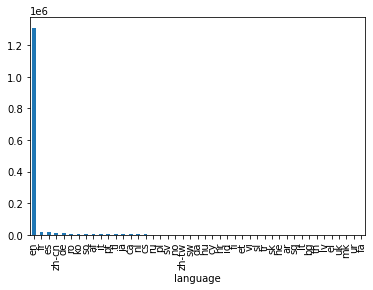

In [22]:
# plot the chart
value_counts = cleaned_df['language'].value_counts()
value_counts.plot(kind='bar')

In [23]:
en_df = cleaned_df[cleaned_df['language']=='en']

In [24]:
en_df.shape

(1311870, 7)

In [25]:
# 17070149, 62953383, 74312785, 25197378

In [26]:
en_df[en_df['reviewer_id']==62953383]

,listing_id,id,date,reviewer_id,reviewer_name,comments,language
1025406,38799388,599032802,2020-01-28,62953383,Dohyup,카드키가 세번 이상 작동한적이 없어요 모두들 같은걸로 고생하고요. 진...짜 귀찮고 카운터에 줄 항상 서있어서 앨리베이터 왔다갔다 기다렸다 하는거때문에 15분족히 잡아먹어요 그것도 매일매일.아예 나갔다 오시면 그냥 바로 카드키 안된다고 하고 바꾸는게 효율적. 위치는 보시다시피 좋습니다. Terrible card key problems. Stayed there for 3 nights and i had to change my card three times. Thats every night me going back and forth from the room to the counter. Theres always people lining up at the counter so you had to wait. Just imagine how frustrating that would be. Other than that everything else was great.,en


In [27]:
en_df[en_df['reviewer_id']==74312785]

,listing_id,id,date,reviewer_id,reviewer_name,comments,language
380,52871,491132264,2019-07-19,74312785,倩,"Micah的房子干净整洁，地理位置特别好，转个弯就是一条街的餐厅，两个街区有二十四小时超市，Micah会提供加州牌照的parking permit，停车就在门口很方便。房东很热情到门口迎接，交代一些注意事项。 Nice, clean place. Very close to many good restaurants. Easy parking and convenient drive to anywhere. Micah is a warm man and he is always there for helping me. It will still be my choice for next trip. ٩(˃̶͈̀௰˂̶͈́)و",en


Since we find that the language detection is not very accuracy. So we will use regular expression to clean it again.

In [28]:
final_review_df = en_df.copy()

In [29]:
final_review_df['comments2'] = final_review_df['comments'].apply(lambda x: re.sub(r"[^A-Za-z0-9\s,.!?]", '', str(x)))

In [30]:
final_review_df[final_review_df['reviewer_id']==25197378]

,listing_id,id,date,reviewer_id,reviewer_name,comments,language,comments2


#### We find that there are many comments are useless. So we will remove the data based on the length that is less than 3.

In [31]:
final_review_df['text_length'] = final_review_df['comments2'].apply(len)
final_review_df[(final_review_df['text_length'] == final_review_df['text_length'].min())]

,listing_id,id,date,reviewer_id,reviewer_name,comments,language,comments2,text_length
52137,621233,407643992,2019-02-02,108351329,Sterling,C,en,C,1
235357,5728008,54834490,2015-11-23,48439195,Mishel,C,en,C,1
655846,20775165,555545086,2019-10-27,127446404,Nicolle,C,en,C,1
809415,26356811,422665516,2019-03-11,188170678,Rob,C,en,C,1
903417,31101008,659180887,2020-08-31,351684508,Tristen,C,en,C,1
972684,35486822,592835118660236272,2022-03-28,304474943,Kenneth,C,en,C,1
1043069,39300364,508812347196201861,2021-12-02,49124901,Shaquille,C,en,C,1
1103701,43329347,727771164,2021-01-30,385411537,Shamia,C,en,C,1
1173263,48158561,741947633,2021-03-24,238802018,Derek,C,en,C,1
1236823,51284419,770367108919245822,2022-11-28,486410982,Ali,o,en,o,1


In [144]:
final_review_df = final_review_df[final_review_df['text_length'] >2]
final_review_df.sample(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments,language,comments2,text_length
640347,20286737,770431721691013076,2022-11-28,127995805,Edwin,Great home feeling and welcome. Very great hosts.,en,Great home feeling and welcome. Very great hosts.,49
1343437,624131989893429408,704435184701705124,2022-08-29,236670172,Linda,"We have an awesome stay. Xi was responsive and provided excellent services via text. The neighborhood is quiet. The place is clean, very spacious, kitchen/ laundry area is well equipped, with other amenities. Beautiful backyard with picnic table. The location is very convenient. Checking in and out was super smooth. Highly recommended to everyone.",en,"We have an awesome stay. Xi was responsive and provided excellent services via text. The neighborhood is quiet. The place is clean, very spacious, kitchen laundry area is well equipped, with other amenities. Beautiful backyard with picnic table. The location is very convenient. Checking in and out was super smooth. Highly recommended to everyone.",348
935966,33250843,736318073,2021-03-04,359606280,Jordan,Exactly as advertised. Josie was very hospitable.,en,Exactly as advertised. Josie was very hospitable.,49
552212,17570773,179909651,2017-08-08,34576931,Izabella,Ed was a great host! The place was a perfect beach getaway for us and everything was perfect.,en,Ed was a great host! The place was a perfect beach getaway for us and everything was perfect.,93
168995,3282972,755381513,2021-05-05,346892226,Dymond,"This place was way better than expected . Super cute and secluded with a beautiful outdoor space. The bed was comfy , the area was cute and trisja was super helpful . We would definitely recommend this place to anyone looking for comfortable and peaceful stay.",en,"This place was way better than expected . Super cute and secluded with a beautiful outdoor space. The bed was comfy , the area was cute and trisja was super helpful . We would definitely recommend this place to anyone looking for comfortable and peaceful stay.",260


In [145]:
# save to csv
final_review_df.to_csv('final_review_df.csv', index=False)

#### Translate other language to english

In [68]:
non_en_df = cleaned_df[cleaned_df['language']!='en']
non_en_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,language
10,2708,222420570,2017-12-29,155985882,Manami,ホストはとても親切で英語の発音の仕方など丁寧に教えてくれた。 部屋はリビングを板で仕切っているのであまりプライバシーが守られていない。 朝になると電話の音やキッチンの音や話し声がそのまま聞こえる。 ハリウッドの中心地から歩いて15分程なのでロケーションは最高はとても便利。 スーパーやその他ショップ、バス停も徒歩5分以内。,ja
33,180926,623253801,2020-04-27,173904821,Shamikah,such a peaceful space!,ro
39,180926,631566322,2020-06-22,350686458,Ekaterina,Peaceful escape,ro
61,52871,556835,2011-09-22,904557,Aurelie,L appartement est tres bien situé et fidele aux photos du site. Micah a ete adorable avec nous et a tout fait pour que l on se sente bien.,fr
146,52871,21087281,2014-10-11,20963527,Bei,首先感谢房东先生第一天给我们的warm welcome，还特别提醒我们车辆可以停放的路边。刚到的那天是晚上所以门牌号有点不好找，而且有些门牌号都隐藏在里面，我们大概找了15分钟，晕噢。后来终于找到了，是一间类似公寓的房子。出入都很方便。房间里的摆设和布置也很温馨，wifi和电视都有，房东还很细心的留下了电视机使用图，很不错！总体来说这两天的入住很愉快。谢谢！,zh-cn


In [69]:
non_en_df.shape

(83412, 7)

We find that there are nan in the comments. So we need to drop them.

In [106]:
non_en_df[non_en_df['comments']=='nan']

,listing_id,id,date,reviewer_id,reviewer_name,comments,language
11071,84636,495249203,2019-07-25,274807820,Quintin,nan,tl
17223,124199,579036832961614906,2022-03-09,300215176,Flower,nan,tl
28770,409740,555105315841340348,2022-02-04,27285770,Kadeem,nan,tl
31988,438464,668226343566784763,2022-07-10,16837415,Zachary,nan,tl
35555,400940,222095314,2017-12-28,54891561,Irene,nan,tl
...,...,...,...,...,...,...,...
1374761,703727818646989923,811705425859581621,2023-01-24,471367329,Zhuqing,nan,tl
1384213,733307482015690100,800097596655374997,2023-01-08,345715194,Karvon,nan,tl
1386163,740120053187181887,834945061408842470,2023-02-25,382912469,Matthew,nan,tl
1390732,759306265762146686,803005517846458209,2023-01-12,9721087,Joy,nan,tl


In [124]:
non_en_df = non_en_df[non_en_df['comments'] != 'nan']
non_en_df.shape

(83087, 7)

In [116]:
def translate_to_english(text):
    translator = GoogleTranslator(source='auto', target='en')
    return translator.translate(text)

In [118]:
non_en_df2 = non_en_df.sample(n=10000)
non_en_df2 = non_en_df2.reset_index(drop=True)

In [123]:
non_en_df2.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,language,comments2
0,26568418,530460913,2019-09-15,13862960,Barbara,"Le studio était génial et répondait largement à nos attentes ! Très bien placé et proche de Melrose Ave, nous n’étions pas loin du quartier branché de Beverly Hills. Michelle et Sam étaient au top pendant notre séjour et nous avons adoré leurs chiens (surtout Harley, il était tellement adorable). Nous gardons cette adresse et nous reviendrons c’est sur ! Merci encore !",fr,"The studio was great and more than met our expectations! Very well located and close to Melrose Ave, we were not far from the trendy area of ​​Beverly Hills. Michelle and Sam were top notch during our stay and we loved their dogs (especially Harley, he was so adorable). We keep this address and we will come back for sure! Thanks again !"
1,20887150,530500198,2019-09-15,21043735,Kyungjin,DiDi 의 친절함과 세심한 배려에 너무나도 잘 쉬고 갑니다. 예쁜 뒷마당도 너무 분위기 좋았습니다. 같이 지낸 제니와 갸토도 너무 이쁘고 귀여웠어요. 정말 미국 가정적인 분위기에서 잘 지냈습니다^^ 공항이랑 해변이랑도 가까워서 편리했습니다!,ko,I rested very well thanks to DiDi's kindness and meticulous consideration. The beautiful backyard was also very atmospheric. Jennie and Gyato who were together were also very pretty and cute. I really had a good time in an American family atmosphere. It was convenient because it was close to the airport and the beach!
2,2516719,301783188,2018-08-04,198523214,Jessica,Belle maison avec une belle chambre confortable. Environnement calme et respectueux. Et près de venice beach en auto en plus!,fr,Beautiful house with a nice comfortable bedroom. Calm and respectful environment. And near Venice Beach by car too!
3,1677768,604869245,2020-02-12,38444104,Theresa,Ett lugnt och trivsamt ställe med gästvänliga människor (och hundar).,sv,A quiet and pleasant place with hospitable people (and dogs).
4,18098133,428696795,2019-03-25,209953999,Sydney,"Great space, clean, private.",ro,"Great space, clean, private."


In [120]:
non_en_df2['comments2'] = non_en_df2['comments'].apply(lambda x: translate_to_english(x))


In [122]:
non_en_df2.sample(50)

,listing_id,id,date,reviewer_id,reviewer_name,comments,language,comments2
1613,17286928,714628498960591805,2022-09-12,131731765,Moonhee,어웈 념뮤 펼룝옒요 청옹말 싫맗히얘욣 됸양꺄웟욞 쳘퉤류 카지맛요 와 너무 좋은 숙소입니다 la에서 잘쉬다가 갑니다.,ko,"Wow, I didn't like it, I didn't like it, I didn't like it."
2579,21325548,518505746,2019-08-26,107545149,Mahamadou,Super appartement !,fr,Great apartment!
185,735514791620448966,748682913084121476,2022-10-29,138745626,Daniel,Moderno departamento,pt,modern apartment
1646,33884448,736140288,2021-03-03,377548800,Jackie,5 stars,sv,5 stars
1223,7594667,431146387465330103,2021-08-17,222761444,Yohannes,Beautiful place,ro,Beautiful place
4719,10454154,708071000,2020-11-10,134982534,Kris,Nice cozy spot,pl,Nice cozy spot
7345,44408051,666717983943939945,2022-07-08,356565979,Nique,Nice place,ro,Nice place
1789,52388463,758122387318333869,2022-11-11,146596188,Coline,"Anita est une super hôte. Nous avons eu la chance d’avoir du réseau sur place et elle a été très réactive. Le lieu est magique. Nous avions un peu peur du froid de novembre mais les couettes chaudes et le chauffage nous ont permis de passer une bonne nuit. Tout est prévu sur place pour passer un bon moment (barbecue, jeu, brasero)",fr,"Anita is a great host. We were lucky to have a network on site and she was very responsive. The place is magical. We were a little afraid of the November cold, but the warm duvets and the heating allowed us to have a good night's sleep. Everything is provided on site to have a good time (barbecue, game, brazier)"
4514,15974796,732182821,2021-02-17,387897800,Sanford,Decent,nl,Decent
3696,286866,508422199,2019-08-12,144422525,Candice,房子两室有点小，房间设施那么新，卫生间很小很旧，洗澡的时候下水还是堵的。两个卫生间只有一个能洗浴，另一个没有洗澡设施。房子价格预定和后来的价格波动特别大，后来便宜很多～～,zh-cn,"The two rooms of the house are a bit small, the room facilities are so new, the bathroom is very small and old, and the water is still blocked when taking a shower. Only one of the two bathrooms can take a bath, and the other has no bathing facilities. The house price reservation and subsequent price fluctuations were particularly large, and it was much cheaper later~~"


In [126]:
# Test with big dataset now
#non_en_df['comments2'] = non_en_df['comments'].apply(lambda x: translate_to_english(x))

In [127]:
#non_en_df.sample(50)